In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_pickle('prepped_df.pkl')

In [3]:
Eaaec_df = pd.read_csv("assets/Edges_agroconcept_and_external_contacts.csv", sep=';')
Ena_df = pd.read_csv("assets/Edges_nonpart_all.csv", sep=';')

edge_df = pd.concat([Eaaec_df,Ena_df])

del Eaaec_df
del Ena_df

In [4]:
lst=['trust', 'knowledge']
   
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(edge_df[lst])
edge_df[lst] = imputer.transform(edge_df[lst])

del lst

In [5]:
edge_df.to_pickle('edge_df.pkl')

In [6]:
degree_dict = edge_df.groupby(edge_df['sender_id'])['sender_id'].count().to_dict()
df['degree'] = df['ego_id'].map(degree_dict)

In [7]:
print(df['degree'].corr(df['CCMM_adopted_percent']))

0.01935054283200558


In [8]:
edge_df['weak tie'] = np.where((edge_df['familymember']!=1) &\
                               (edge_df['partner']!=1) &\
                               (edge_df['neighbour']!=1) &\
                               (edge_df['friend']!=1), 1, 0)

weak_tie_dict = edge_df.groupby(edge_df['sender_id'])['weak tie'].sum().to_dict()

df['weak_ties'] = df['ego_id'].map(weak_tie_dict)

In [9]:
print(df['weak_ties'].corr(df['CCMM_adopted_percent']))

0.08145826849923145


In [10]:
tot_freq_dict = edge_df.groupby(edge_df['sender_id'])['frequency'].sum().to_dict()
df['tot_freq'] = df['ego_id'].map(tot_freq_dict)

In [11]:
print(df['tot_freq'].corr(df['CCMM_adopted_percent']))

0.13864221787965586


In [12]:
edge_df['frequency_qual'] = edge_df['frequency'] * edge_df['trust'] * edge_df['knowledge']

In [13]:
tot_freq_qual_dict = edge_df.groupby(edge_df['sender_id'])['frequency_qual'].sum().to_dict()
df['tot_freq_qual'] = df['ego_id'].map(tot_freq_qual_dict)

<AxesSubplot:xlabel='tot_freq_qual', ylabel='CCMM_adopted_percent'>

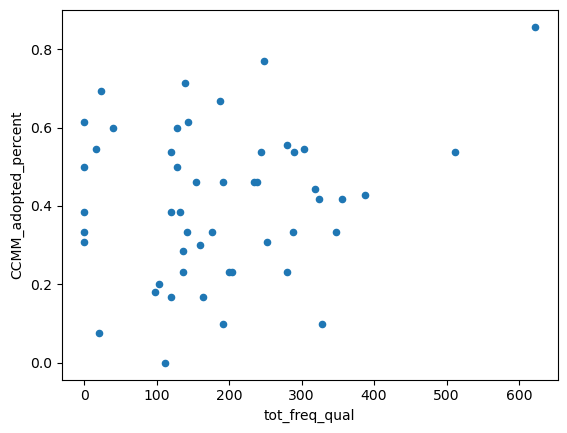

In [14]:
df.plot.scatter(x='tot_freq_qual', y='CCMM_adopted_percent')

In [15]:
print(df['tot_freq_qual'].corr(df['CCMM_adopted_percent']))

0.19327579173471482


In [16]:
df.to_pickle('features_df.pkl')

finito